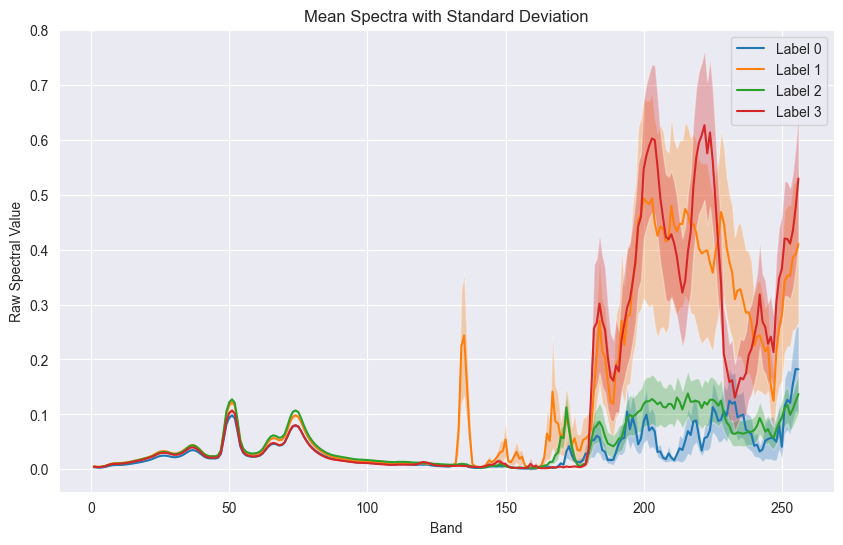

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# SNV转换函数

def apply_snv(input_df):
    # 减去均值并除以标准差
    return input_df.sub(input_df.mean(axis=1), axis=0).div(input_df.std(axis=1), axis=0)

# 加载数据
df = pd.read_csv('Figs/test_spectra_labels.csv')

# 应用SNV转换
spectra_columns = [f'band_{i}' for i in range(1, 257)]
spectra_df = df[spectra_columns]

# 对波段值进行绝对值处理
df[spectra_columns] = np.abs(spectra_df)

# 初始化绘图
plt.figure(figsize=(10, 6))

# 初始化存储数据的字典
data_to_save = {}
# 计算并保存每个类别的原始平均光谱和标准差
for label in [0, 1, 2, 3]:
    label_data = df[df['label'] == label]
    mean_spectrum = label_data[spectra_columns].mean()
    std_spectrum = label_data[spectra_columns].std() / 10

    data_to_save[f'original_mean_label_{label}'] = mean_spectrum
    data_to_save[f'original_std_label_{label}'] = std_spectrum
        # 绘制平均光谱曲线
    sns.lineplot(x=np.arange(1, 257), y=mean_spectrum, label=f'Label {label}')

    # 填充标准差阴影
    plt.fill_between(np.arange(1, 257), mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, alpha=0.3)
plt.title('Mean Spectra with Standard Deviation')
plt.xlabel('Band')
plt.ylabel('Raw Spectral Value')
plt.legend()
# 保存图像为SVG文件
plt.savefig('original_spectra_plot.svg', format='svg',dpi=600)

plt.show()
plt.show()



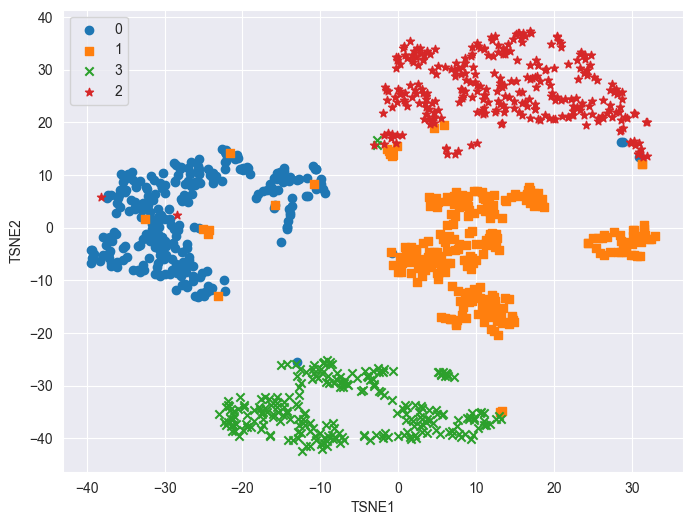

In [50]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 加载特征和标签
# 假设 features_2d 是您的特征数组，labels 是对应的标签数组
df = pd.read_csv('1dcnn_features.csv')
features_2d = df.drop('label',axis=1)
labels = df['label']

# 执行t-SNE降维
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_2d)

# 转换为DataFrame，方便绘图
tsne_df = pd.DataFrame(data=features_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = labels
# 定义每个标签的marker
markers = {
    '0': 'o',  # 圆形
    '1': 's',  # 方块
    '2': '*',  # 星星
    '3': 'x',  # 叉号
    # ... 为其他标签定义marker ...
}
# 绘制散点图

plt.figure(figsize=(8, 6))
for label in tsne_df['label'].unique():

    plt.scatter(tsne_df[tsne_df['label'] == label]['TSNE1'],
                tsne_df[tsne_df['label'] == label]['TSNE2'],
                label=label,marker=markers[str(label)])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.savefig('1d_cnn_tsne.svg', format='svg',dpi=600)
plt.show()

          lda1      lda2
0    -1.542198  0.544445
1    -1.615161 -0.665764
2    -2.063592 -0.179255
3    -1.375486 -2.017836
4     2.410841  0.174597
...        ...       ...
1060 -1.652422 -1.985846
1061  6.481964 -0.397674
1062  0.354080  0.678300
1063 -1.227965  0.082643
1064 -2.884534  0.318877

[1065 rows x 2 columns]
(1065,)
      TSNE1  TSNE2  label
0       NaN    NaN      0
1       NaN    NaN      1
2       NaN    NaN      1
3       NaN    NaN      3
4       NaN    NaN      2
...     ...    ...    ...
1060    NaN    NaN      3
1061    NaN    NaN      2
1062    NaN    NaN      1
1063    NaN    NaN      1
1064    NaN    NaN      0

[1065 rows x 3 columns]


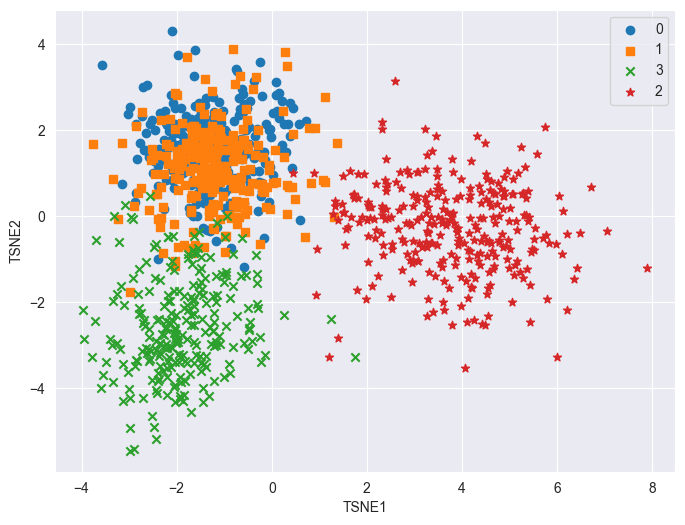

In [63]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 加载特征和标签
# 假设 features_2d 是您的特征数组，labels 是对应的标签数组
df = pd.read_csv('lda_features.csv')
features_tsne=df.drop('label',axis=1)
print(features_tsne)
labels = df['label']
print(labels.shape)
# 执行t-SNE降维
#tsne = TSNE(n_components=2, random_state=42)
#features_tsne = tsne.fit_transform(features_2d)

# 转换为DataFrame，方便绘图
tsne_df = pd.DataFrame(data=features_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = labels
# 定义每个标签的marker
markers = {
    '0': 'o',  # 圆形
    '1': 's',  # 方块
    '2': '*',  # 星星
    '3': 'x',  # 叉号
    # ... 为其他标签定义marker ...
}
print(tsne_df)
# 绘制散点图
plt.figure(figsize=(8, 6))
for label in tsne_df['label'].unique():

    plt.scatter(df[df['label'] == label]['lda1'],
                df[df['label'] == label]['lda2'],
                label=label,marker=markers[str(label)])

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.savefig('lda.svg', format='svg',dpi=600)
plt.show()

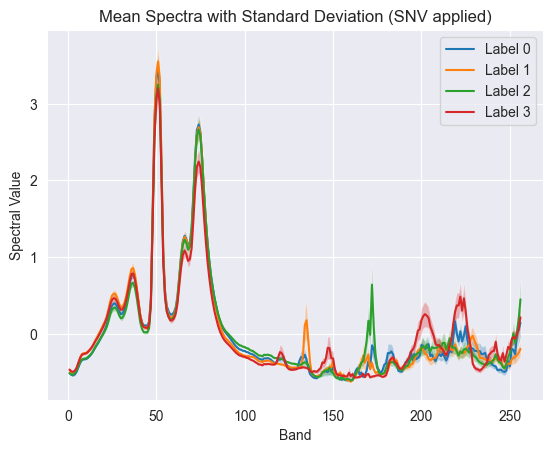

In [27]:
# 应用SNV转换
df[spectra_columns] = apply_snv(df[spectra_columns])

# 对于每个标签，计算平均光谱和标准差，并绘制曲线
for label in [0, 1, 2, 3]:
    # 筛选特定标签的数据
    data = df[df['label'] == label]

    # 计算平均光谱和标准差
    mean_spectrum = data[spectra_columns].mean()
    std_spectrum = data[spectra_columns].std() /10
    data_to_save[f'snv_mean_label_{label}'] = mean_spectrum
    data_to_save[f'snv_std_label_{label}'] = std_spectrum
    # 绘制平均光谱曲线
    sns.lineplot(x=np.arange(1, 257), y=mean_spectrum, label=f'Label {label}')

    # 填充标准差阴影
    plt.fill_between(np.arange(1, 257), mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, alpha=0.3)

# 设置图表标题和标签
plt.title('Mean Spectra with Standard Deviation (SNV applied)')
plt.xlabel('Band')
plt.ylabel('Spectral Value')
plt.legend()
plt.savefig('SNV_spectra_plot.svg', format='svg',dpi=600)
plt.show()

In [10]:
# 保存数据到CSV文件
for key, value in data_to_save.items():
    value.to_csv(f'{key}.csv')

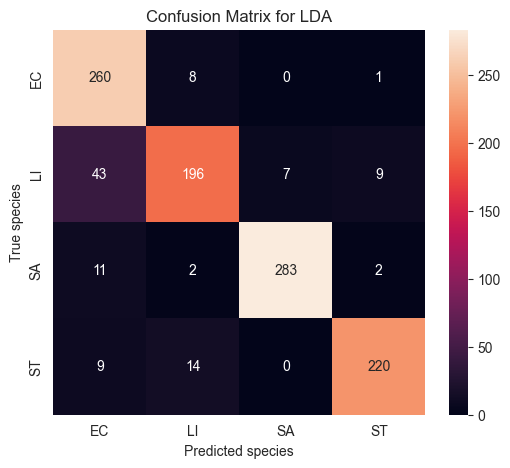

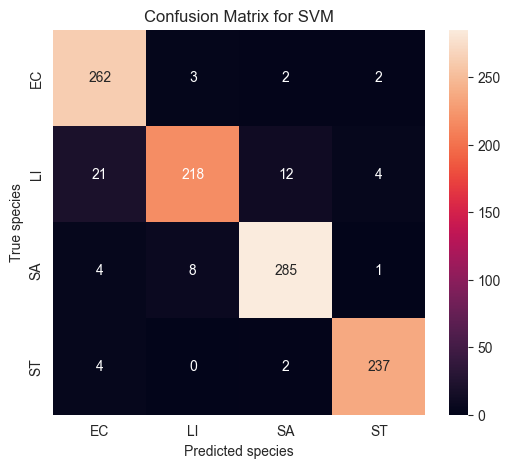

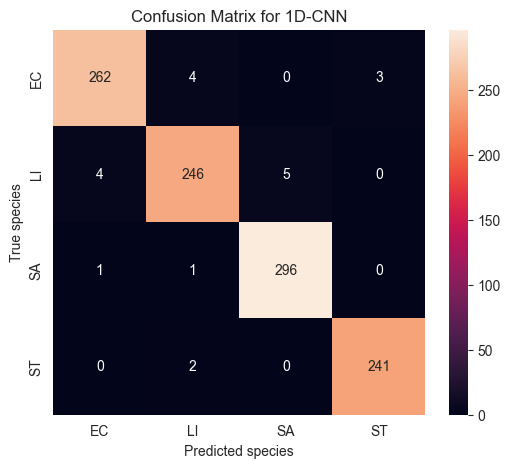

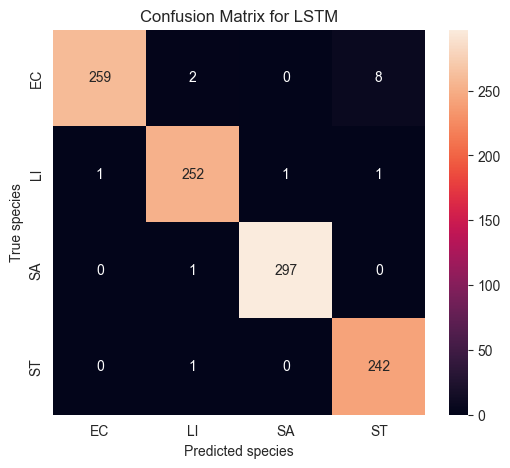

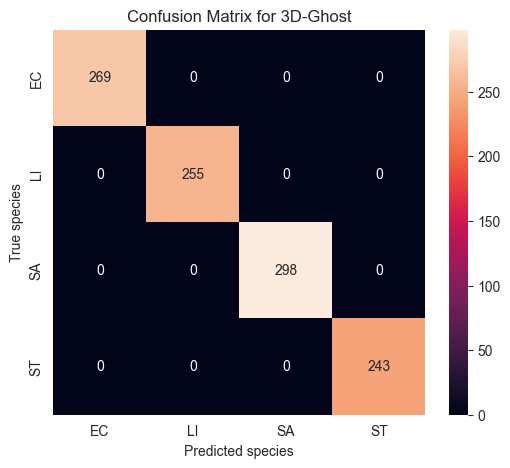

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 加载数据
labels=['EC','LI','SA','ST']
df = pd.read_csv('classifiers_pred.csv')
y_test = df['y_test']
classifiers = {
    'LDA': df['y_lda_pred'],
    'SVM': df['y_svm_pred'],
    '1D-CNN': df['y_1d_cnn_pred'],
    'LSTM': df['y_lstm_pred'],
    '3D-Ghost': df['y_3d_pred']
}

# 绘制混淆矩阵
for name, pred in classifiers.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True species')
    plt.xlabel('Predicted species')
    plt.savefig(name+'_CM.svg', format='svg',dpi=600)
    plt.show()


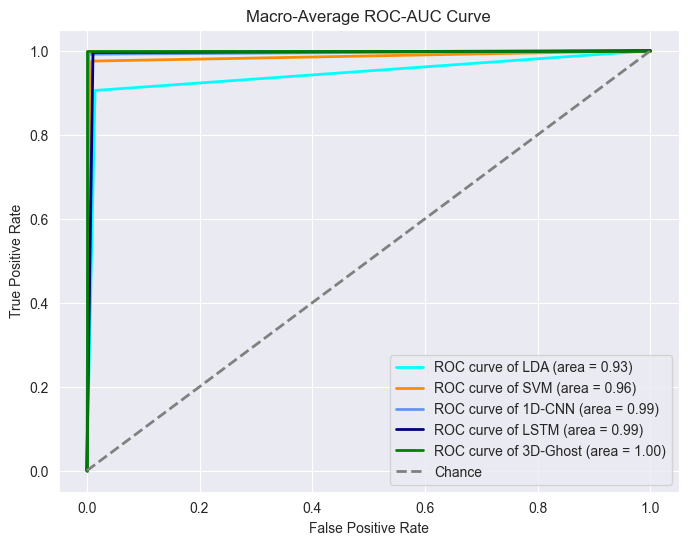

In [36]:
# 绘制ROC-AUC曲线
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
n_classes = len(labels)

# 二值化标签
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# 绘制ROC-AUC曲线
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'green'])

for name, pred, color in zip(classifiers.keys(), classifiers.values(), colors):
    # 二值化预测结果
    pred_binarized = label_binarize(pred, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 计算平均ROC-AUC
    roc_auc_score_avg = roc_auc_score(y_test_binarized, pred_binarized, multi_class='ovr')
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {name} (area = {roc_auc_score_avg:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Average ROC-AUC Curve')
plt.legend(loc="lower right")

plt.savefig('ROC-AUC.svg', format='svg',dpi=600)
plt.show()